# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-65.6.3-py3-none-any.whl (1.2 MB)
  Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled wheel-0.34.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.3.0
    Uninstalling setuptools-59.3.0:
      Successfully uninstalled setuptools-59.3.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.0/286.0 kB 141.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pip install -U kaggle
!ln -s /root/.local/bin/kaggle /usr/bin/kaggle

  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-7.0.0-py2.py3-none-any.whl (9.4 kB)


In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "kkpdealwis"
kaggle_key = "ebbd1ebd896473f5a41249ad8c2b2766"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 8.31MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train["datetime"]=pd.to_datetime(train["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test["datetime"]=pd.to_datetime(test["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv("submission.csv")
submission["datetime"]=pd.to_datetime(submission["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
train.loc[:, ~train.columns.isin(["casual","registered"])]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [ ]:
predictor = TabularPredictor(label="count", eval_metric="r2").fit(
    train_data=train.loc[:,~train.columns.isin(["casual","registered"])],
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230108_130948/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230108_130948/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.914821      11.983320  504.495106                0.000913           0.380531            3       True         15
1   RandomForestMSE_BAG_L2   0.913033      11.153294  408.941783                0.602447          25.267345            2       True         12
2     ExtraTreesMSE_BAG_L2   0.911487      11.130527  391.352485                0.579681           7.678046            2       True         14
3          LightGBM_BAG_L2   0.907286      10.755500  407.651069                0.204654          23.976631            2       True         11
4          CatBoost_BAG_L2   0.905956      10.595625  447.192554                0.044779          63.518115            2       True         13
5        LightGBMXT_BAG_L2   0.888500      13.919498  439.409328                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6857197008702899,
  'KNeighborsDist_BAG_L1': 0.7843047406609882,
  'LightGBMXT_BAG_L1': 0.4732562269834053,
  'LightGBM_BAG_L1': 0.4

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    24.224512
1    41.502090
2    45.746605
3    48.688057
4    51.911980
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.761124
std        90.385674
min         2.877595
25%        20.743717
50%        63.315071
75%       170.579605
max       364.524780
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
(predictions<0).sum().sum()

0

In [ ]:
# Set them to zero
predictions.iloc[predictions<0] = 0
predictions.lt(0).value_counts()

False    6493
Name: count, dtype: int64

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
submission

,datetime,count
0,2011-01-20 00:00:00,24.224512
1,2011-01-20 01:00:00,41.502090
2,2011-01-20 02:00:00,45.746605
3,2011-01-20 03:00:00,48.688057
4,2011-01-20 04:00:00,51.911980
...,...,...
6488,2012-12-31 19:00:00,159.255676
6489,2012-12-31 20:00:00,159.314621
6490,2012-12-31 21:00:00,153.429642
6491,2012-12-31 22:00:00,150.233093


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 320kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission.csv               2023-01-08 13:26:01  first raw submission                 complete  1.80775      1.80775       
submission_new_hpo_3.csv     2023-01-08 10:45:50  new features with hyperparameters-3  complete  1.75705      1.75705       
submission_new_hpo_2.csv     2023-01-08 10:30:38  new features with hyperparameters-2  complete  1.86412      1.86412       
submission_new_hpo.csv       2023-01-08 10:25:12  new features with hyperparameters    complete  1.77666      1.77666       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

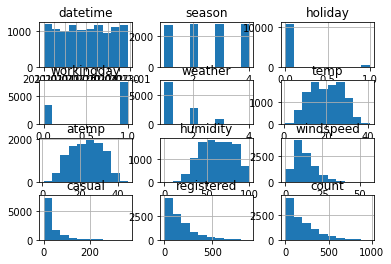

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [ ]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [ ]:
# create a new feature
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19


In [ ]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
train["day"] = train["day"].astype("category")
train["month"] = train["month"].astype("category")
train["year"] = train["year"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")
test["day"] = test["day"].astype("category")
test["month"] = test["month"].astype("category")
test["year"] = test["year"].astype("category")

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1


In [ ]:
train.dtypes

datetime      datetime64[ns]
season              category
holiday                int64
workingday             int64
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                category
month               category
day                 category
dtype: object

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>],
       [<AxesSubplot:title={'center':'count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

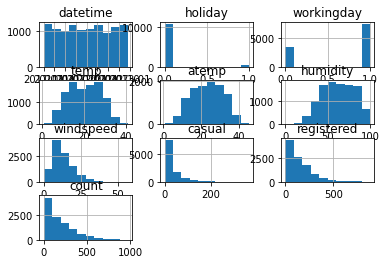

In [ ]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(label="count", eval_metric="r2").fit(
    train_data=train.loc[:,~train.columns.isin(["casual","registered"])],
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230108_133033/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230108_133033/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.914850       9.976251  447.305846                0.000666           0.257076            3       True         14
1   RandomForestMSE_BAG_L2   0.913987       9.681453  422.720236                0.591395          27.104279            2       True         12
2          LightGBM_BAG_L2   0.908020       9.384190  419.944491                0.294132          24.328534            2       True         11
3          CatBoost_BAG_L2   0.899304       9.224468  445.357205                0.134410          49.741248            2       True         13
4        LightGBMXT_BAG_L2   0.879371      13.412015  466.390158                4.321957          70.774201            2       True         10
5    KNeighborsDist_BAG_L1   0.784305       0.039759    0.029374                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6857197008702899,
  'KNeighborsDist_BAG_L1': 0.7843047406609882,
  'LightGBMXT_BAG_L1': 0.47781124875147507,
  'LightGBM_BAG_L1': 0.4763421261293649,
  'RandomForestMSE_BAG_L1': 0.58508

In [ ]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    23.983315
1    44.603458
2    47.808014
3    50.275848
4    52.085480
Name: count, dtype: float32

In [ ]:
predictions_new_features.describe()

count    6493.000000
mean      101.317993
std        89.262283
min         3.446519
25%        22.701035
50%        63.303978
75%       166.152481
max       364.681793
Name: count, dtype: float64

In [ ]:
predictions_new_features.iloc[predictions_new_features<0] = 0
predictions_new_features.lt(0).value_counts()

False    6493
Name: count, dtype: int64

In [ ]:
# Same submitting predictions
submission_new_features=pd.read_csv("submission_new_features.csv")
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
submission_new_features=pd.read_csv("submission_new_features.csv")
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,23.983315
1,2011-01-20 01:00:00,44.603460
2,2011-01-20 02:00:00,47.808014
3,2011-01-20 03:00:00,50.275850
4,2011-01-20 04:00:00,52.085480


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 371kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-01-08 13:45:44  new features                         complete  1.74994      1.74994       
submission.csv               2023-01-08 13:26:01  first raw submission                 complete  1.80775      1.80775       
submission_new_hpo_3.csv     2023-01-08 10:45:50  new features with hyperparameters-3  complete  1.75705      1.75705       
submission_new_hpo_2.csv     2023-01-08 10:30:38  new features with hyperparameters-2  complete  1.86412      1.86412       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
predictor_new_hpo = TabularPredictor(label="count", eval_metric="r2").fit(
    train_data=train.loc[:,~train.columns.isin(["casual","registered"])],
    time_limit=600,
    num_bag_folds=5,
    num_bag_sets=1,
    num_stack_levels=1,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230108_142312/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230108_142312/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fea

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.914963       9.786023  513.065963                0.000771           0.358071            3       True         17
1   RandomForestMSE_BAG_L2   0.913396       8.878830  413.648163                0.606475          29.267603            2       True         13
2     ExtraTreesMSE_BAG_L2   0.911098       8.872498  393.569075                0.600143           9.188515            2       True         15
3          LightGBM_BAG_L2   0.905732       8.476852  398.976756                0.204498          14.596196            2       True         12
4          CatBoost_BAG_L2   0.904952       8.374135  459.655578                0.101781          75.275018            2       True         14
5        LightGBMXT_BAG_L2   0.878641      11.819981  423.885011                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.685719700870

In [ ]:
test.dtypes

datetime      datetime64[ns]
season              category
holiday                int64
workingday             int64
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
year                category
month               category
day                 category
dtype: object

In [ ]:
predictions_new_hpo_1 = predictor_new_hpo.predict(test)
predictions_new_hpo_1.head()

0    22.565632
1    42.410923
2    46.700130
3    49.626633
4    52.091034
Name: count, dtype: float32

In [ ]:
# Remember to set all negative values to zero
predictions_new_hpo_1.iloc[predictions_new_hpo<0] = 0
predictions_new_hpo_1.lt(0).value_counts()

False    6493
Name: count, dtype: int64

In [ ]:
# Same submitting predictions
submission_new_hpo=pd.read_csv("submission_new_hpo.csv")
submission_new_hpo["count"] = predictions_new_hpo_1
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
submission_new_hpo = pd.read_csv("submission_new_hpo.csv")
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,22.565632
1,2011-01-20 01:00:00,42.410923
2,2011-01-20 02:00:00,46.700130
3,2011-01-20 03:00:00,49.626633
4,2011-01-20 04:00:00,52.091034


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 432kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-01-08 14:38:59  new features with hyperparameters    complete  1.76310      1.76310       
submission_new_hpo_2.csv     2023-01-08 14:20:40  new features with hyperparameters-2  complete  1.74994      1.74994       
submission_new_hpo.csv       2023-01-08 14:07:18  new features with hyperparameters    complete  1.74994      1.74994       
submission_new_features.csv  2023-01-08 13:45:44  new features                         complete  1.74994      1.74994       


In [ ]:
predictor_new_hpo = TabularPredictor(label="count", eval_metric="r2").fit(
    train_data=train.loc[:,~train.columns.isin(["casual","registered"])],
    time_limit=600,
    num_bag_folds=0,
    num_bag_sets=20,
    num_stack_levels=0,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230108_143917/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=0, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230108_143917/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

[1000]	valid_set's l2: 17785.9	valid_set's r2: 0.467589
[2000]	valid_set's l2: 17581.6	valid_set's r2: 0.473717
[3000]	valid_set's l2: 17581.2	valid_set's r2: 0.473774


	0.4753	 = Validation score   (r2)
	6.51s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 592.25s of the 592.25s of remaining time.
	0.4801	 = Validation score   (r2)
	1.96s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 590.06s of the 590.05s of remaining time.
	0.5523	 = Validation score   (r2)
	10.1s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 577.65s of the 577.65s of remaining time.
	0.4561	 = Validation score   (r2)
	64.31s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 513.21s of the 513.21s of remaining time.
	0.507	 = Validation score   (r2)
	4.78s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 506.18s of the 506.18s of remaining time.
	0.4533	 = Validation score   (r2)
	12.08

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        KNeighborsDist   0.744221       0.008810   0.020586                0.008810           0.020586            1       True          2
1   WeightedEnsemble_L2   0.744221       0.009358   0.421394                0.000548           0.400808            2       True         12
2        KNeighborsUnif   0.639545       0.010221   0.024910                0.010221           0.024910            1       True          1
3       RandomForestMSE   0.552256       0.165657  10.098518                0.165657          10.098518            1       True          5
4         ExtraTreesMSE   0.506987       0.154183   4.776243                0.154183           4.776243            1       True          7
5         LightGBMLarge   0.484611       0.046693   2.811501                0.046693           2.811501 

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.6395447258765232,
  'KNeighborsDist': 0.7442206313772077,
  'LightGBMXT': 0.4752539154016644,
  'LightGBM': 0.48013160195009386,
  'RandomForestMSE': 0.5522559886727701,
  'CatBoost': 0.456135156583804,
  'ExtraTreesMSE': 0.5069868671160374,
  'NeuralNetFastAI': 0.45334709924523453,
  'XGBoost': 0.4600416658641776,
  'NeuralNetTorch': 0.4165057458848799,
  'LightGBMLarge': 0.48461059437774623,
  'WeightedEnsemble_L2': 0.7442206313772077},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': 'Autogluo

In [ ]:
predictions_new_hpo2 = predictor_new_hpo.predict(test)
predictions_new_hpo2.head()

0    51.861626
1    56.686295
2    59.077763
3    60.468830
4    61.419930
Name: count, dtype: float32

In [ ]:
# Remember to set all negative values to zero
predictions_new_hpo2.iloc[predictions_new_hpo<0] = 0
predictions_new_hpo2.lt(0).value_counts()

False    6493
Name: count, dtype: int64

In [ ]:
# Same submitting predictions
submission_new_hpo_2=pd.read_csv("submission_new_hpo_2.csv")
submission_new_hpo_2["count"] = predictions_new_hpo2
submission_new_hpo_2.to_csv("submission_new_hpo_2.csv", index=False)

In [ ]:
submission_new_hpo_2 = pd.read_csv("submission_new_hpo_2.csv")
submission_new_hpo_2.head()

,datetime,count
0,2011-01-20 00:00:00,51.861626
1,2011-01-20 01:00:00,56.686295
2,2011-01-20 02:00:00,59.077763
3,2011-01-20 03:00:00,60.468830
4,2011-01-20 04:00:00,61.419930


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_2.csv -m "new features with hyperparameters-2"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 420kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo_2.csv     2023-01-08 14:50:47  new features with hyperparameters-2  complete  1.86412      1.86412       
submission_new_hpo.csv       2023-01-08 14:38:59  new features with hyperparameters    complete  1.76310      1.76310       
submission_new_hpo_2.csv     2023-01-08 14:20:40  new features with hyperparameters-2  complete  1.74994      1.74994       
submission_new_hpo.csv       2023-01-08 14:07:18  new features with hyperparameters    complete  1.74994      1.74994       


In [ ]:
predictor_new_hpo = TabularPredictor(label="count", eval_metric="r2").fit(
    train_data=train.loc[:,~train.columns.isin(["casual","registered"])],
    time_limit=600,
    num_bag_folds=10,
    num_bag_sets=20,
    num_stack_levels=3,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230108_145430/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=3, num_bag_folds=10, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230108_145430/"
AutoGluon Version:  0.6.1
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L4   0.914657      16.015584  469.517184                0.000815           0.240119            4       True         17
1      WeightedEnsemble_L3   0.914584      10.931015  251.683628                0.000978           0.267489            3       True         12
2          CatBoost_BAG_L3   0.914268      15.224519  420.248585                0.154624          55.432153            3       True         16
3   RandomForestMSE_BAG_L2   0.913475      10.631417  221.062393                0.607798          27.118757            2       True         10
4      WeightedEnsemble_L5   0.913203      17.180377  569.757120                0.000712           0.199308            5       True         21
5          LightGBM_BAG_L3   0.912381      15.217824  390.897705                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L3': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L3': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L3': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L4': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L4': 'StackerEnsembleModel_LGB'

In [ ]:
predictions_new_hpo3 = predictor_new_hpo.predict(test)
predictions_new_hpo3.head()

0    27.284031
1    41.960678
2    44.227718
3    49.611282
4    52.107834
Name: count, dtype: float32

In [ ]:
# Remember to set all negative values to zero
predictions_new_hpo3.iloc[predictions_new_hpo3<0] = 0
predictions_new_hpo3.lt(0).value_counts()

False    6493
Name: count, dtype: int64

In [ ]:
# Same submitting predictions
submission_new_hpo_3=pd.read_csv("submission_new_hpo_3.csv")
submission_new_hpo_3["count"] = predictions_new_hpo3
submission_new_hpo_3.to_csv("submission_new_hpo_3.csv", index=False)

In [ ]:
submission_new_hpo = pd.read_csv("submission_new_hpo_3.csv")
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,27.284030
1,2011-01-20 01:00:00,41.960680
2,2011-01-20 02:00:00,44.227720
3,2011-01-20 03:00:00,49.611282
4,2011-01-20 04:00:00,52.107834


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_3.csv -m "new features with hyperparameters-3"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 295kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                          status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo_3.csv     2023-01-08 15:13:10  new features with hyperparameters-3  complete  1.78169      1.78169       
submission_new_hpo_3.csv     2023-01-08 15:12:23  new features with hyperparameters-3  complete  1.86412      1.86412       
submission_new_hpo_2.csv     2023-01-08 14:50:47  new features with hyperparameters-2  complete  1.86412      1.86412       
submission_new_hpo.csv       2023-01-08 14:38:59  new features with hyperparameters    complete  1.76310      1.76310       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

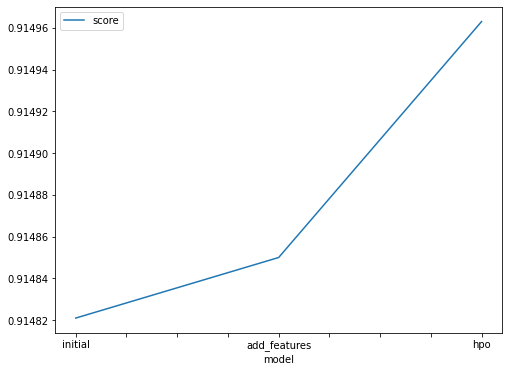

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [0.914821, 0.914850, 0.914963]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

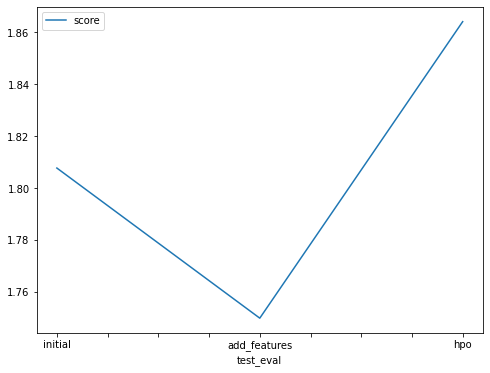

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80775, 1.74994, 1.86412]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "net_bag_folds": [0, 0, 0],
    "net_bag_sets": [1, 1, 20],
    "net_stack_levels": [0, 0, 0],
    "score": [1.80775, , 1.86412]
})

,model,net_bag_folds,net_bag_sets,net_stack_levels,score
0,initial,0,1,0,1.80775
1,add_features,0,1,0,1.74994
2,hpo,0,20,0,1.86412
